In [18]:
import numpy as np
import pandas as pd

In [19]:
df= pd.read_csv('spam.csv', encoding ='latin1')

In [20]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2351,spam,Download as many ringtones as u like no restri...,NaN,NaN,NaN
5171,ham,Oh k. . I will come tomorrow,NaN,NaN,NaN
4123,ham,"Hey sexy buns ! Have I told you ? I adore you,...",NaN,NaN,NaN
498,ham,"Kate jackson rec center before 7ish, right?",NaN,NaN,NaN
4365,ham,Mm yes dear look how i am hugging you both. :-P,NaN,NaN,NaN


In [21]:
df.shape

(5572, 5)

In [24]:
# Steps that we will follow:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Make web UI to demostrate the application

## 1. Data Cleaning

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [26]:
# Drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [27]:
df.sample(5)

,v1,v2
1605,ham,When you came to hostel.
2584,ham,Hi happy birthday. Hi hi hi hi hi hi hi
1534,ham,Remember on that day..
3894,ham,Yes. Last practice
3984,ham,"Whatever, juliana. Do whatever you want."


In [29]:
# Renaming the columns as v1 and v2 name are not decriptive
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3750,ham,"Haha... Sounds crazy, dunno can tahan anot..."
203,ham,Goodmorning sleeping ga.
4351,ham,Hows the pain dear?y r u smiling?
3438,ham,"awesome, how do I deal with the gate? Charles ..."
4493,ham,Man this bus is so so so slow. I think you're ...


In [36]:
# The value of target is eighter 'ham' or 'spam' but we want numbers there
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [37]:
df['target'] = encoder.fit_transform(df['target'])

In [38]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
# Checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [40]:
# Checking for duplicate values
df.duplicated().sum()

403

In [46]:
# So we have to remove the duplicates
df = df.drop_duplicates(keep='first')

In [47]:
df.duplicated().sum()

0

In [49]:
# Now the shape of our data frame is:
df.shape

(5169, 2)

## 2. EDA

In [50]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

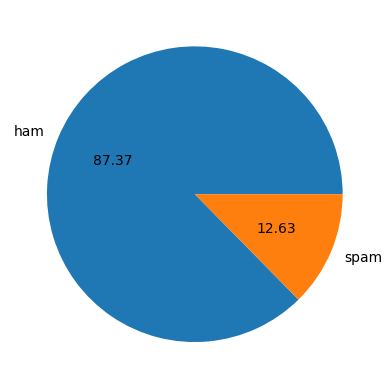

In [55]:
# Using piechart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [56]:
# Note that the data is imbalanced

In [58]:
 # Now we will analyse number of characters in the SMS, number of words in the SMS and number of sentences in the SMS.

In [61]:
import nltk

In [62]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\devbi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [63]:
# Making a new column for number of charaters
df['num_characters'] = df['text'].apply(len)

In [64]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [67]:
# Making a new column for number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [68]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [70]:
# Making a new column for number of sentence.
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [71]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [73]:
# Now we will compute the descriptive statistics of the columns 'num_characters', 'num_words', and 'num_sentences'
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [76]:
# For 'ham' values
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [77]:
# For 'spam' values
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [81]:
# Now let's plot a histogram for both the categories
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

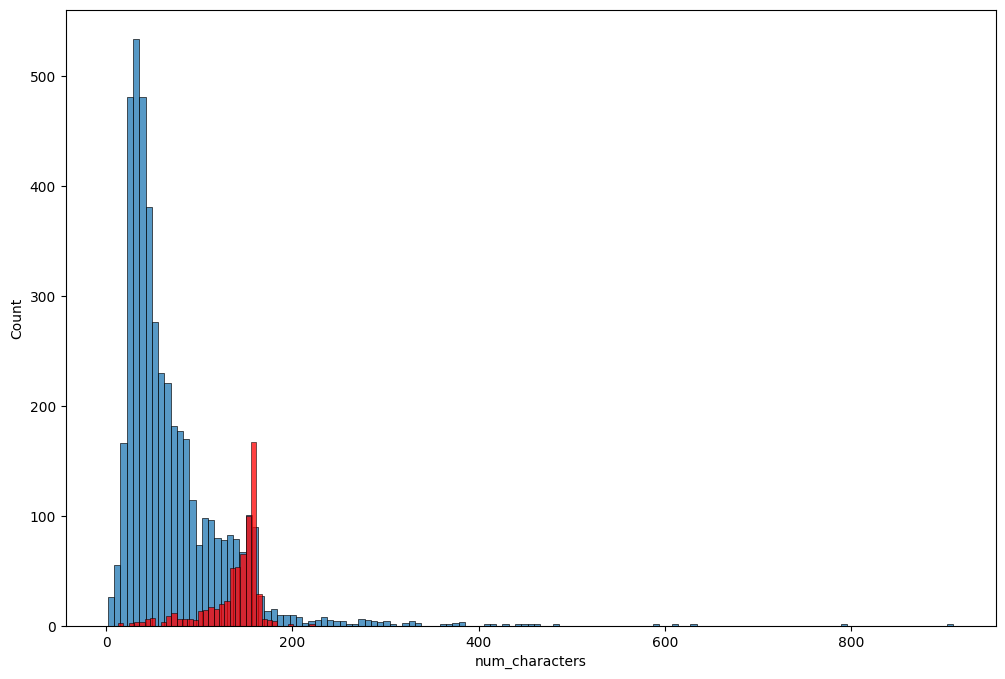

In [85]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

In [86]:
# Now here we can observer that, in most of the ham messages number of charater are very less whereas number of characters in spam messages is more. 

<Axes: xlabel='num_words', ylabel='Count'>

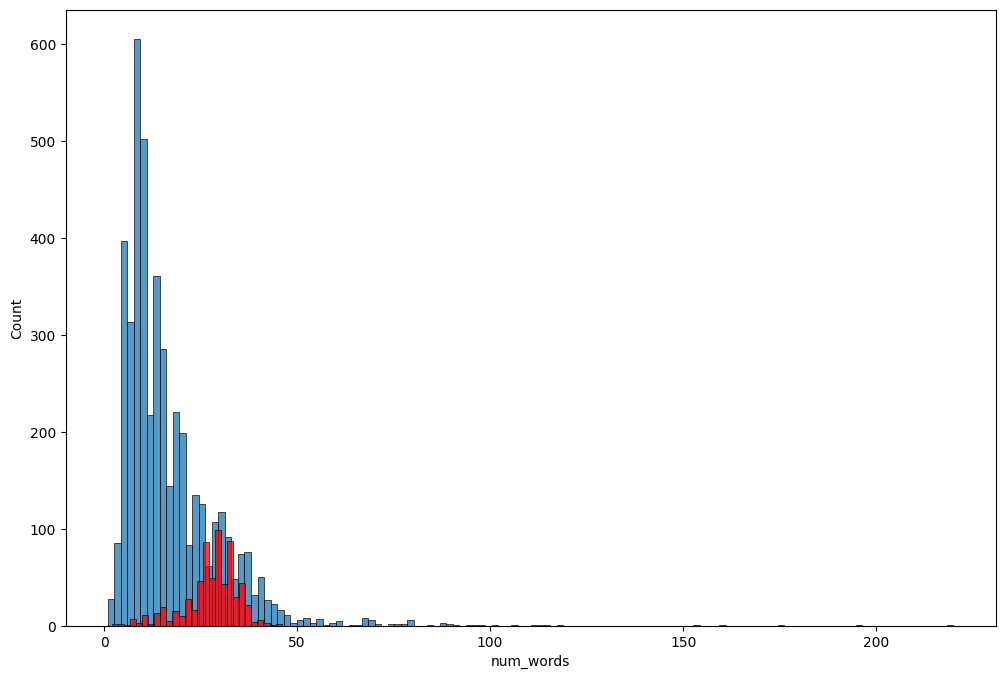

In [88]:
# Doing same thing with number of words instead of number of charaters
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

In [89]:
# We can see the similar histogram in case of number of words also

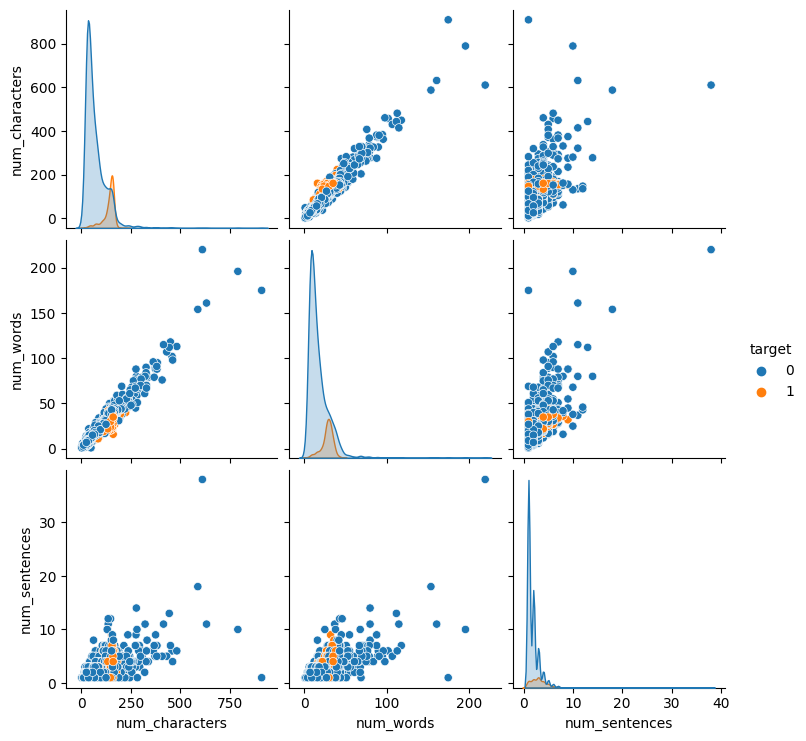

In [91]:
# Now lets see what is the relation of these three columns with each other.
sns.pairplot(df, hue='target')

C:\Users\devbi\AppData\Local\Temp\ipykernel_28744\1582790632.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

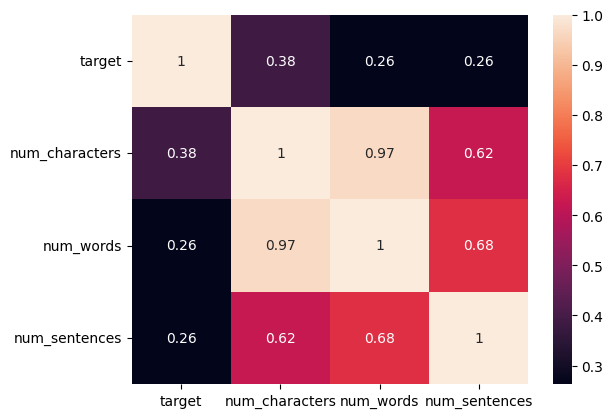

In [95]:
# calculating correlation coefficient with heat map
sns.heatmap(df.corr(), annot=True)

In [96]:
# here we can see that num of chqaracters have highest correlation with target=1(spam sms) so we will keep num_charaters column only

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing sepecial charaters
- Removing stop words and punctuation
- Stemming

In [117]:
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)

In [120]:
# create a new column called 'transformed_text'
df['transformed_text'] = df['text'].apply(transform_text)

In [121]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [128]:
# now we will genrate word cloud of spam and ham messages
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [129]:
# for spam messages
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

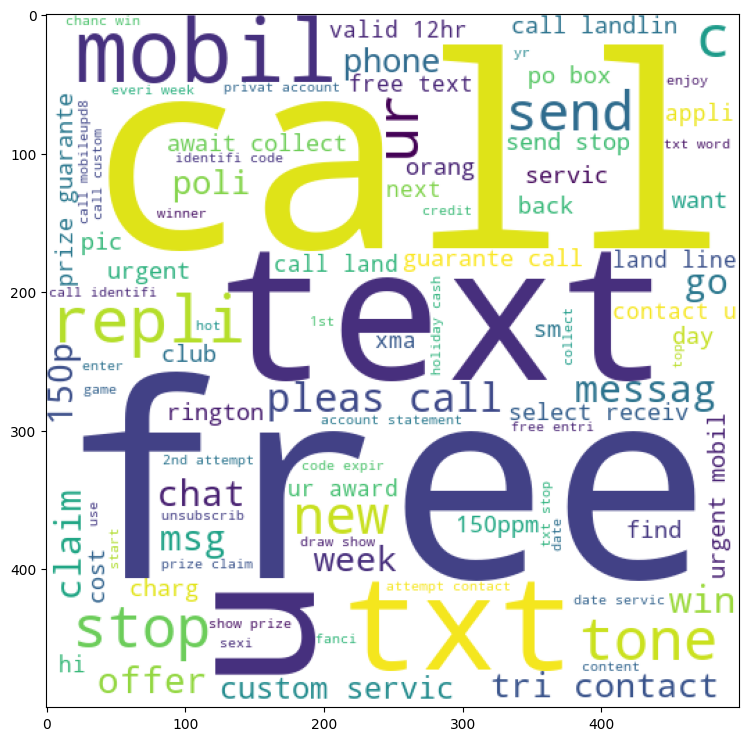

In [133]:
plt.figure(figsize=(12.6, 9))
plt.imshow(spam_wc)

In [151]:
# for ham messages
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

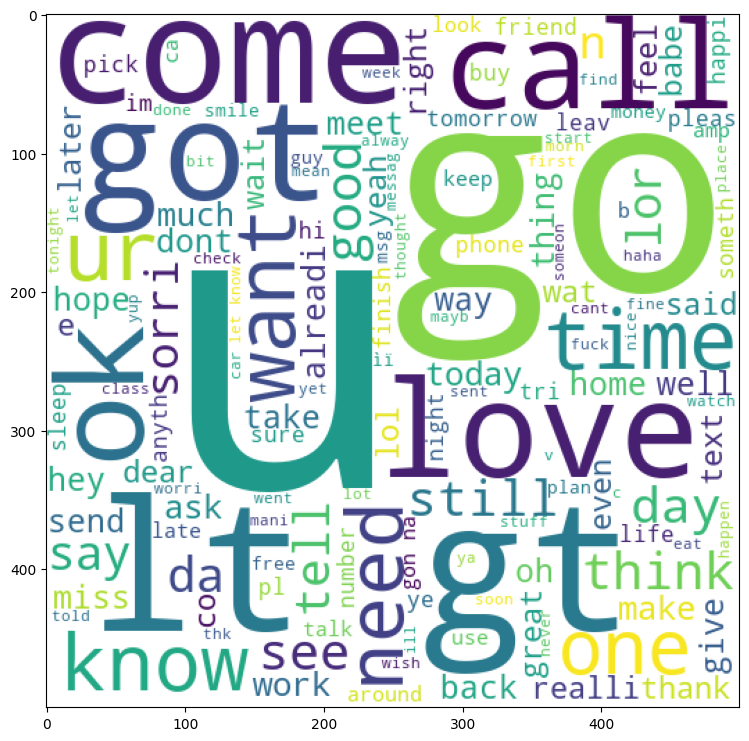

In [152]:
plt.figure(figsize=(12.6, 9))
plt.imshow(ham_wc)

In [153]:
# now lets find top 30 words in spam messaages
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [154]:
len(spam_corpus)

9939

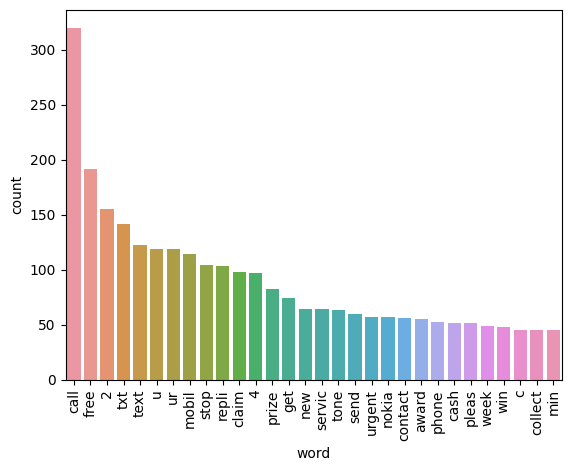

In [157]:
from collections import Counter

# Get the 30 most common words and their counts for spam messages
top_30_words = Counter(spam_corpus).most_common(30)
top_30_words_df = pd.DataFrame(top_30_words, columns=['word', 'count'])

# Plot the bar chart
sns.barplot(x='word', y='count', data=top_30_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [160]:
# now lets find top 30 words in ham messaages
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [161]:
len(ham_corpus)

35404

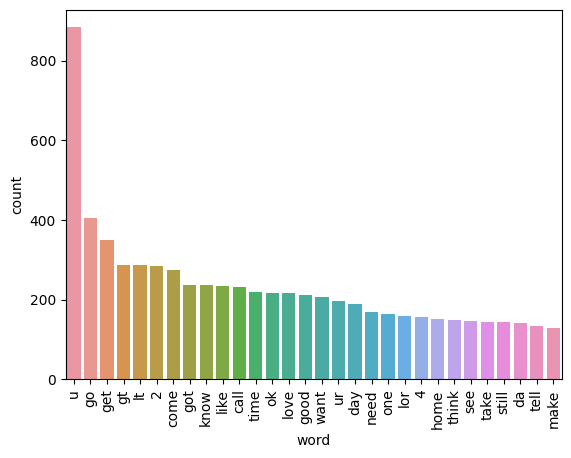

In [162]:
# Get the 30 most common words and their counts for spam messages
top_30_words = Counter(ham_corpus).most_common(30)
top_30_words_df = pd.DataFrame(top_30_words, columns=['word', 'count'])

# Plot the bar chart
sns.barplot(x='word', y='count', data=top_30_words_df)
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [180]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [181]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [182]:
X.shape

(5169, 3000)

In [183]:
y = df['target'].values

In [184]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [187]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [188]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [189]:
# for Gaussian Naive Bayse
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [190]:
# for Multinomial Naive Bayse
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2)) 
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [191]:
# for Bernoulli Naive Bayse
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [192]:
# So, here we can go with Bernoulli NB or Multinomial NB, but since precision score matters more in this case, we will go with Multinomial NB, although the accuracy is lower compared to Bernoulli NB due to the imbalanced data. Therefore, precision score matters more.

In [193]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))